**Abdullah Shahzad**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 4a: Pandas and Principle Component Analysis

In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [8,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/34/4xmzvvms1dbbhz5gqx6gpsbh0000gn/T/ipykernel_8782/2394358706.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/34/4xmzvvms1dbbhz5gqx6gpsbh0000gn/T/ipykernel_8782/2394358706.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


 

## Task 1:  Introduction to Pandas

We are going to be using Pandas, covariance matrices and principle component analysis to explore a dataset on breast cancer diagnosis data. More information about the dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv 
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation:
    1. In one method call get the shape and print the results.
    2. To get the column headers and print them.
    3. In one method call get the first 5 items and print the results.
    4. Find the mean of each column
3. Create a `cancer_x` dataframe which includes columns 2-11 (radius_mean - fractal_dimension_mean).
4. Update `cancer_x` to be normalized from 0-1, by subtracting by the minimum and dividing by the range. 
5. Create a `cancer_y` series with from the column `diagnosis` and set it to be [lowercase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html)


In [9]:
url="https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

data = pd.read_csv(url)
print(data.shape)
print(data.columns)
print(data.head())
print(data.mean(axis = 0))

cancer_x = data.iloc[:,2:12]
cancer_x = (cancer_x - cancer_x.min()) / (cancer_x.max() - cancer_x.min())
cancer_y = data['diagnosis'].str.lower()

(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  843483

/var/folders/34/4xmzvvms1dbbhz5gqx6gpsbh0000gn/T/ipykernel_8782/2013859717.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.mean(axis = 0))


## Task 2: Create and Visualize a Covariance Matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the pairwise covariance of the `cancer_x` columns, store the resulting covariance matrix, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`
        1. If necessary, rotating the text for the x-axis using `setp`
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a [colorbar](https://matplotlib.org/3.1.1/gallery/axes_grid1/simple_colorbar.html).
    
**Question:** What interpretations can you draw from this covariance matrix?

**Answer** There is a strong correlation between the points that are yellow and the purple points.

(10, 10)


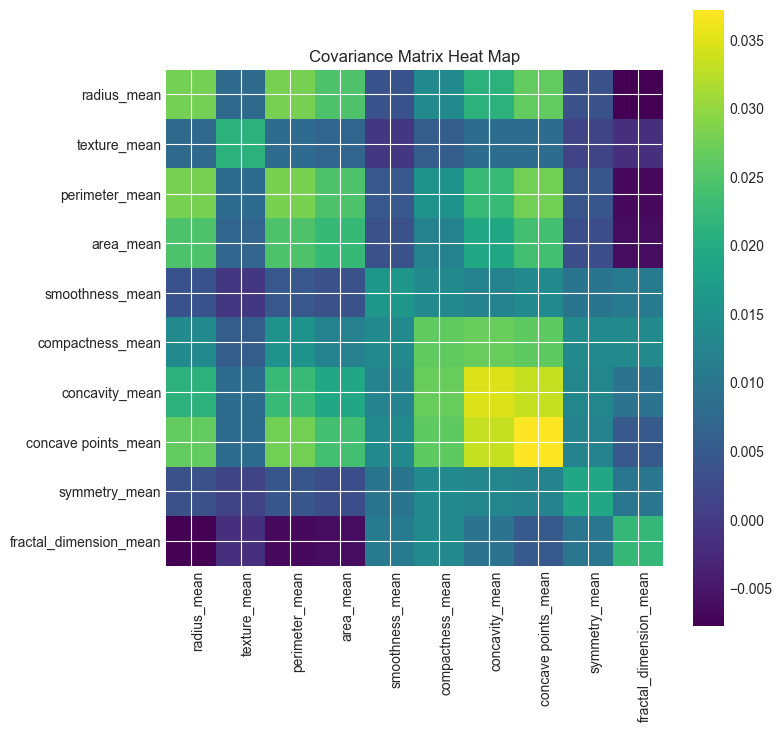

In [10]:
cov = cancer_x.cov()
print(cov.shape)

fig, ax = plt.subplots()
im = ax.imshow(cov, cmap='viridis')

ax.set_title("Covariance Matrix Heat Map")

xticks = np.arange(0, 10, 1)
yticks = np.arange(0, 10, 1)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels(cancer_x.columns)
ax.set_yticklabels(cancer_x.columns)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

fig.colorbar(im, ax=ax);

## Task 3: Visualizing Principle Component Analysis

### 3a) Principle Component Analysis
1. Use [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and right eigenvectors of the covariance matrix.  
1. Print the eigen_values and the first 2 eigenvectors.
2. Transform the data with the eigen_vectors.
    1. Matrix multiply cancer_x with the first two columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.

**Question:**  Which 2 variables are the first eigenvector most dependent on?  How does that relate to the heatmap?

**Answer** 

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(cov)

print("Eigen values: ")
print(eigen_values)
print("First 2 Eigen vectors: ")
print(eigen_vectors[:,0:2])

transformed_data = cancer_x @ eigen_vectors[:,0:2]

print("Transformed data:")
print(transformed_data[:5])



print('''
-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868
-----------------------------------
''')

Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121
 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
          0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868

-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  

### 3b) Graph a scatterplot of the transformed data

Graph a scatterplot of the transformed data using [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html)
1. Scatter Parameters
    1. Graph the first principle component on the x axis (first column of the tranformed data)
    2. Graph the second principle component on the y axis (second column of the tranformed data)
    3. Use the `cancer_y` series for the color with a black edgecolor
3. Include a title, and axis labels.
4. Add a custom [legend](https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html) using mpatches.
    1. Create 1 patch with the color `m` for malignant
    1. Create 1 patch with the color `b` for benign

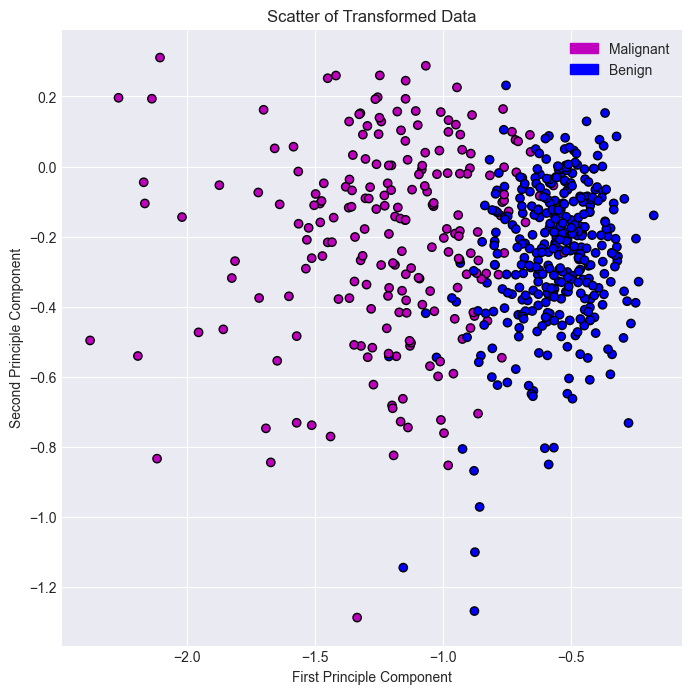

In [12]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
plt.scatter(transformed_data.iloc[:,0], transformed_data.iloc[:,1], c=cancer_y, edgecolor='k')

plt.title("Scatter of Transformed Data")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

m_patch = mpatches.Patch(color='m', label='Malignant')
b_patch = mpatches.Patch(color='b', label='Benign')

plt.legend(handles=[m_patch, b_patch])

plt.show();